In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv"
data = pd.read_csv(url)
data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [ ]:
def calc_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'MolLogP': Descriptors.MolLogP(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol)
        }
    else:
        return None

desc_list = [calc_descriptors(s) for s in data['smiles']]
desc_df = pd.DataFrame([d for d in desc_list if d is not None])
desc_df['Solubility'] = data['measured log solubility in mols per litre']
desc_df.head()

,MolWt,MolLogP,NumHDonors,NumHAcceptors,Solubility
0,457.432,-3.10802,7,12,-0.77
1,201.225,2.84032,1,2,-3.30
2,152.237,2.87800,0,1,-2.06
3,278.354,6.29940,0,0,-7.87
4,84.143,1.74810,0,1,-1.33


In [ ]:
X = desc_df.drop('Solubility', axis=1)
y = desc_df['Solubility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # FIXED
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.8563114717294801
R²: 0.8448699341433368


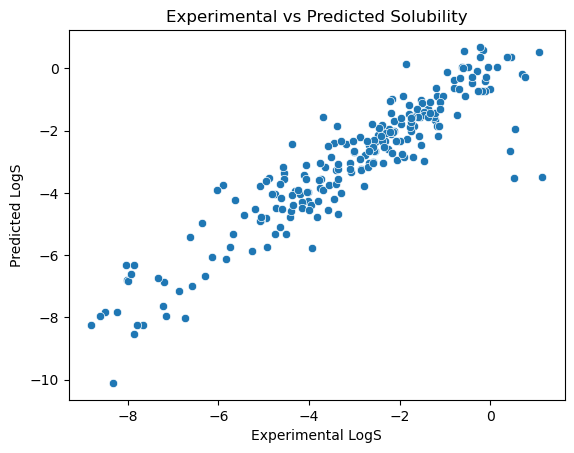

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Experimental LogS")
plt.ylabel("Predicted LogS")
plt.title("Experimental vs Predicted Solubility")
plt.show()